In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import powerlaw, geom, zscore, rankdata
from sklearn.preprocessing import quantile_transform
import seaborn as sns

In [4]:
B = np.random.normal(loc=5, scale=2, size=10000)  
I = powerlaw.rvs(a=0.3, size=10000)               
H = geom.rvs(p=0.005, size=10000)

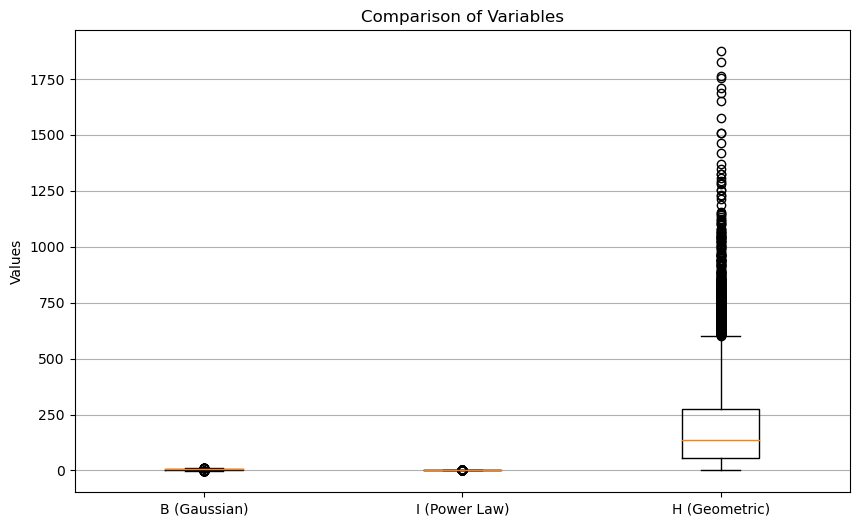

In [5]:
plt.figure(figsize=(10, 6))
plt.boxplot([B, I, H], labels=['B (Gaussian)', 'I (Power Law)', 'H (Geometric)'])
plt.title('Comparison of Variables')
plt.ylabel('Values')
plt.grid(axis='y')
plt.show()

In [17]:
def compare_histograms(original, normalized, name):
    plt.figure(figsize=(14, 8))

    plt.subplot(1, 2, 1)
    sns.histplot(original, bins=50, color='orange', kde=False)
    plt.title(f'{name} Original')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(normalized, bins=50, color='blue', kde=False)
    plt.title(f'{name} Normalized')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

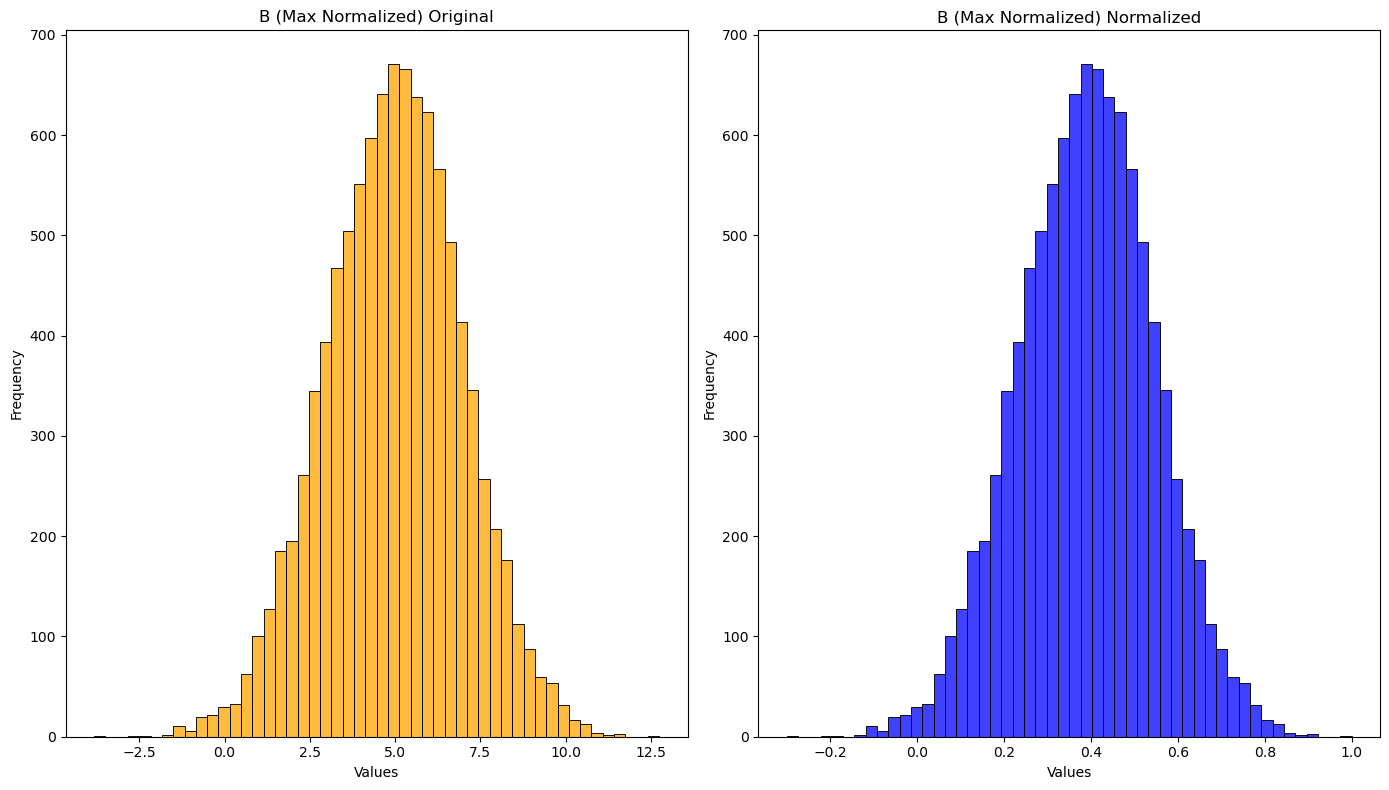

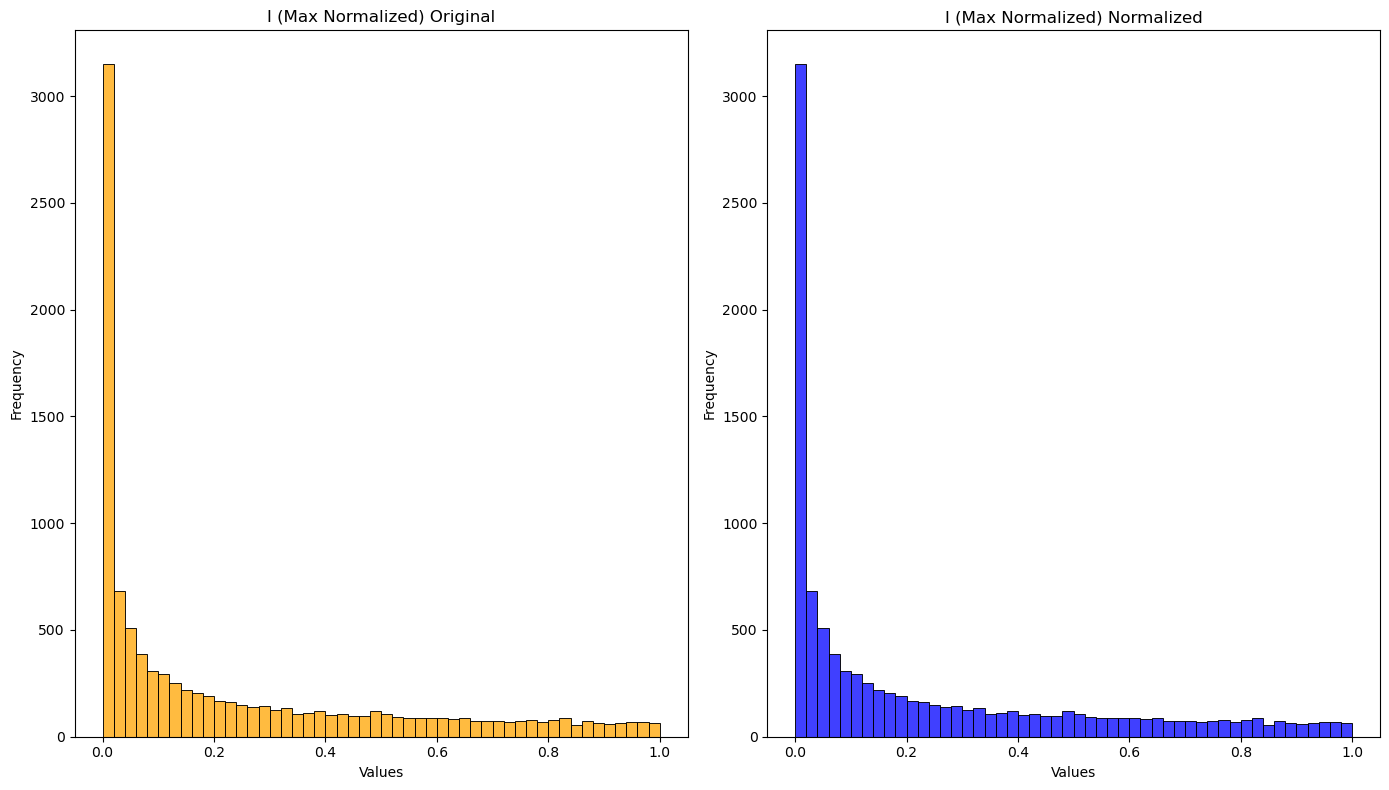

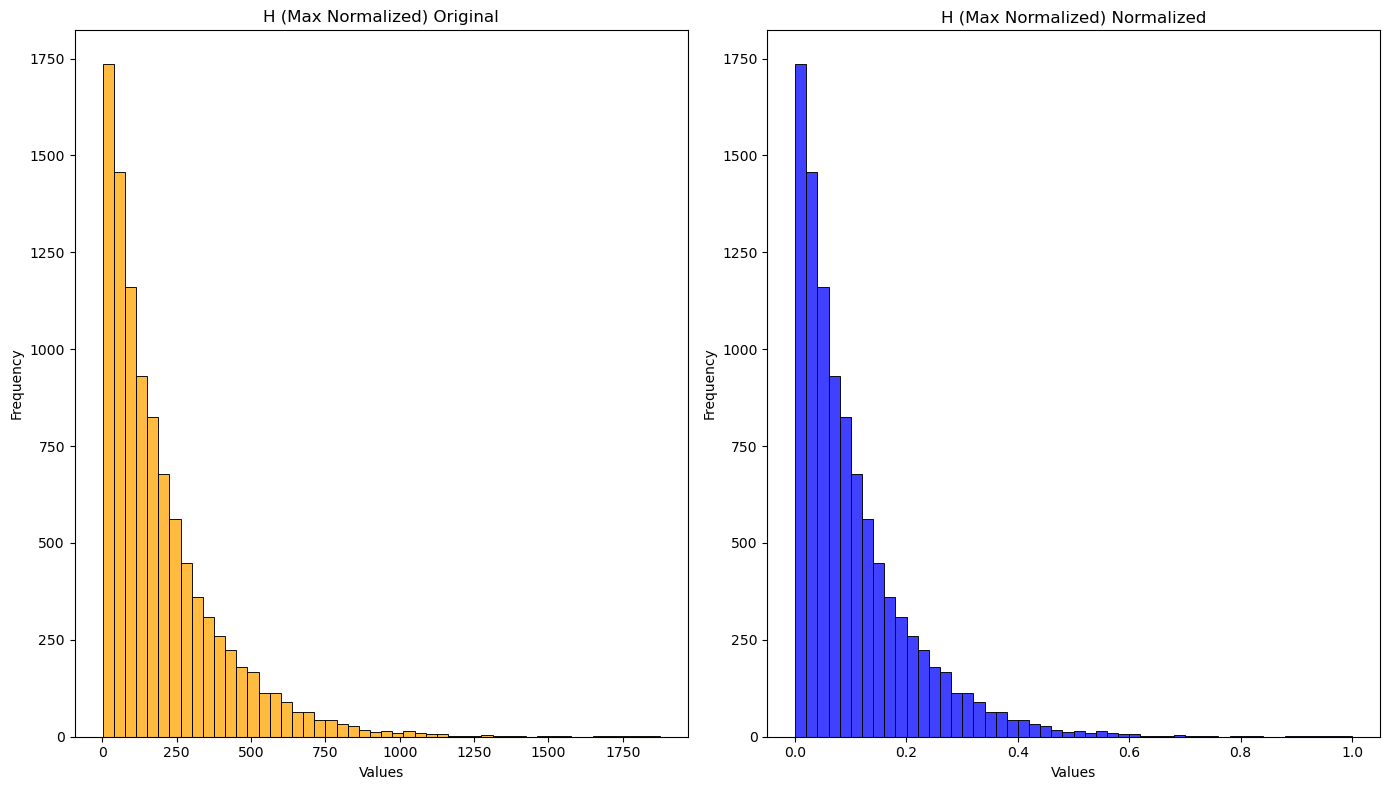

In [11]:
# Divide each variable by max
B_max = B / np.max(B)
I_max = I / np.max(I)
H_max = H / np.max(H)

compare_histograms(B, B_max, 'B (Max Normalized)')
compare_histograms(I, I_max, 'I (Max Normalized)')
compare_histograms(H, H_max, 'H (Max Normalized)')

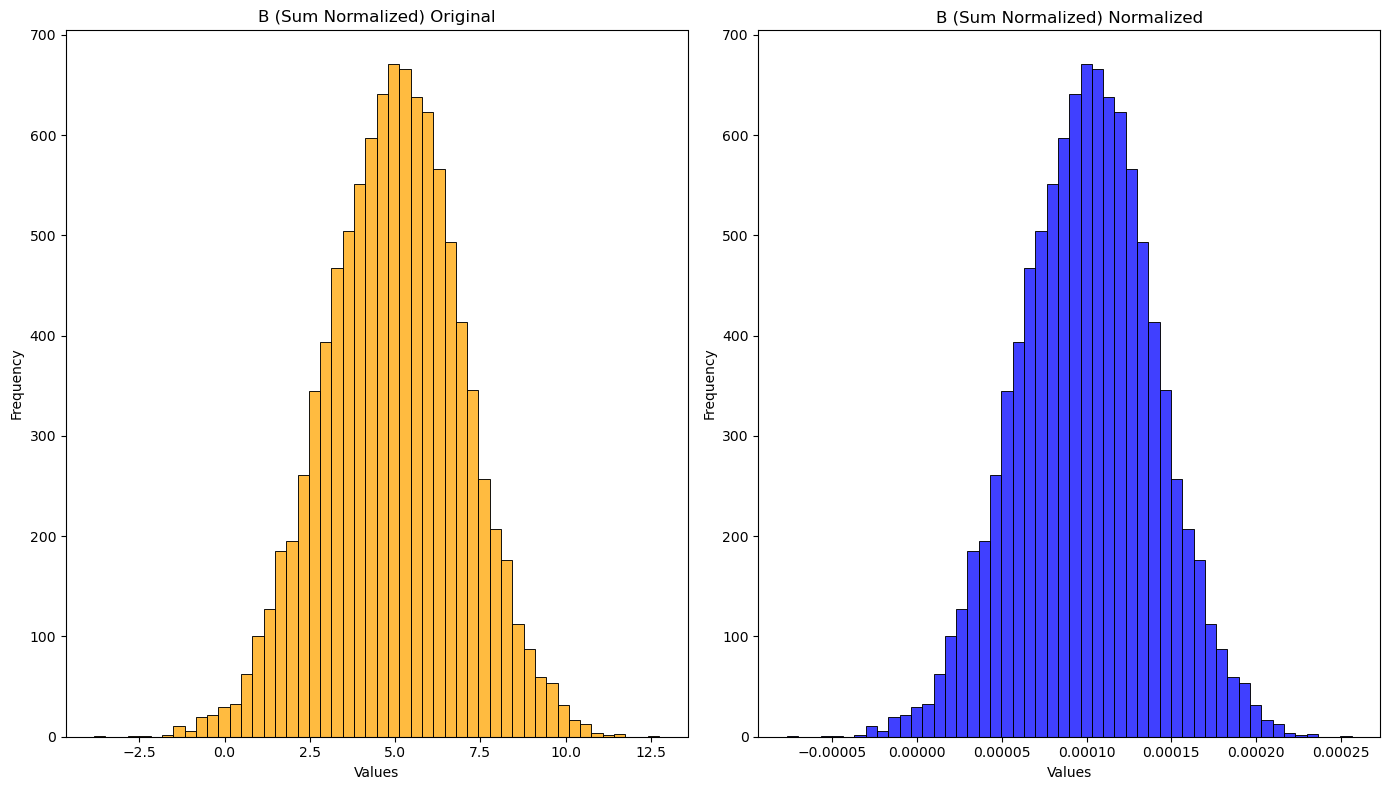

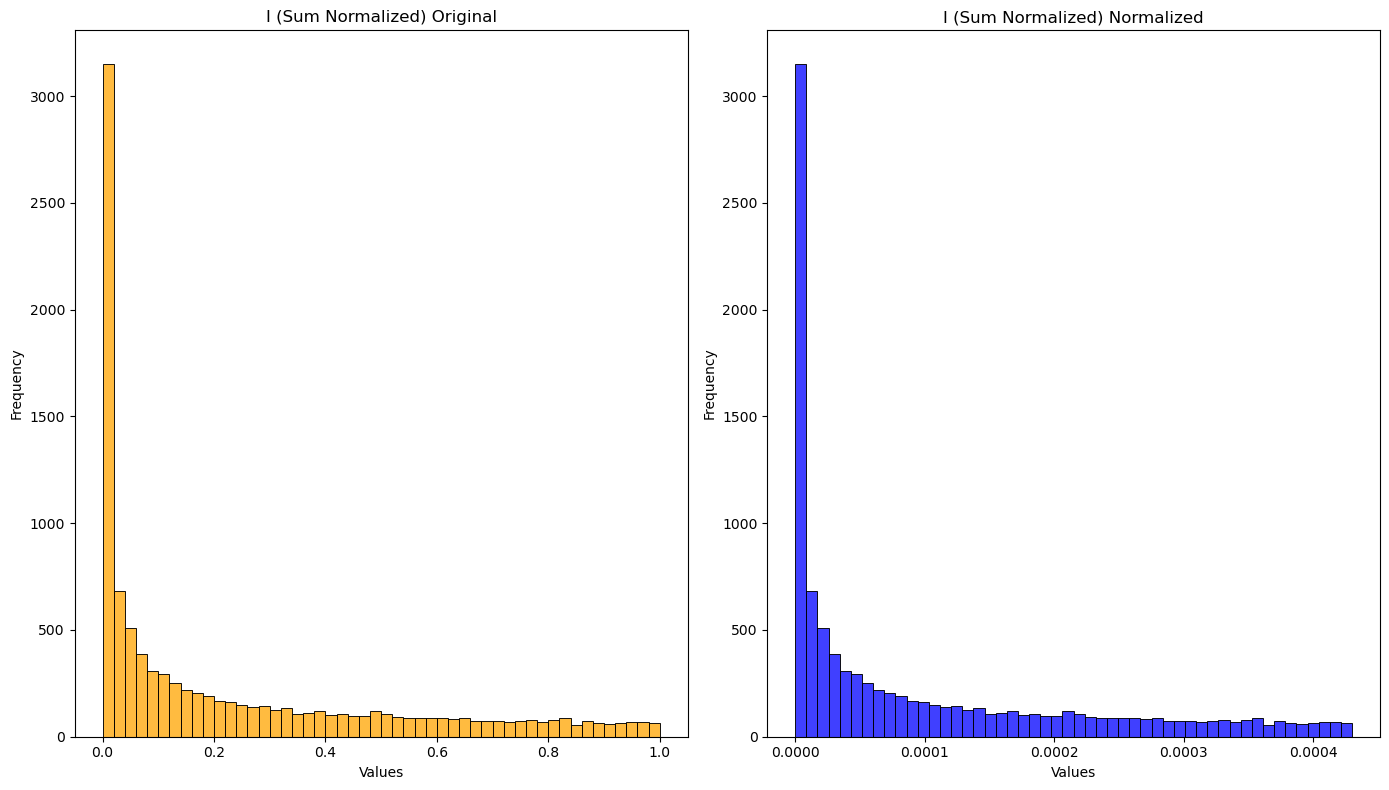

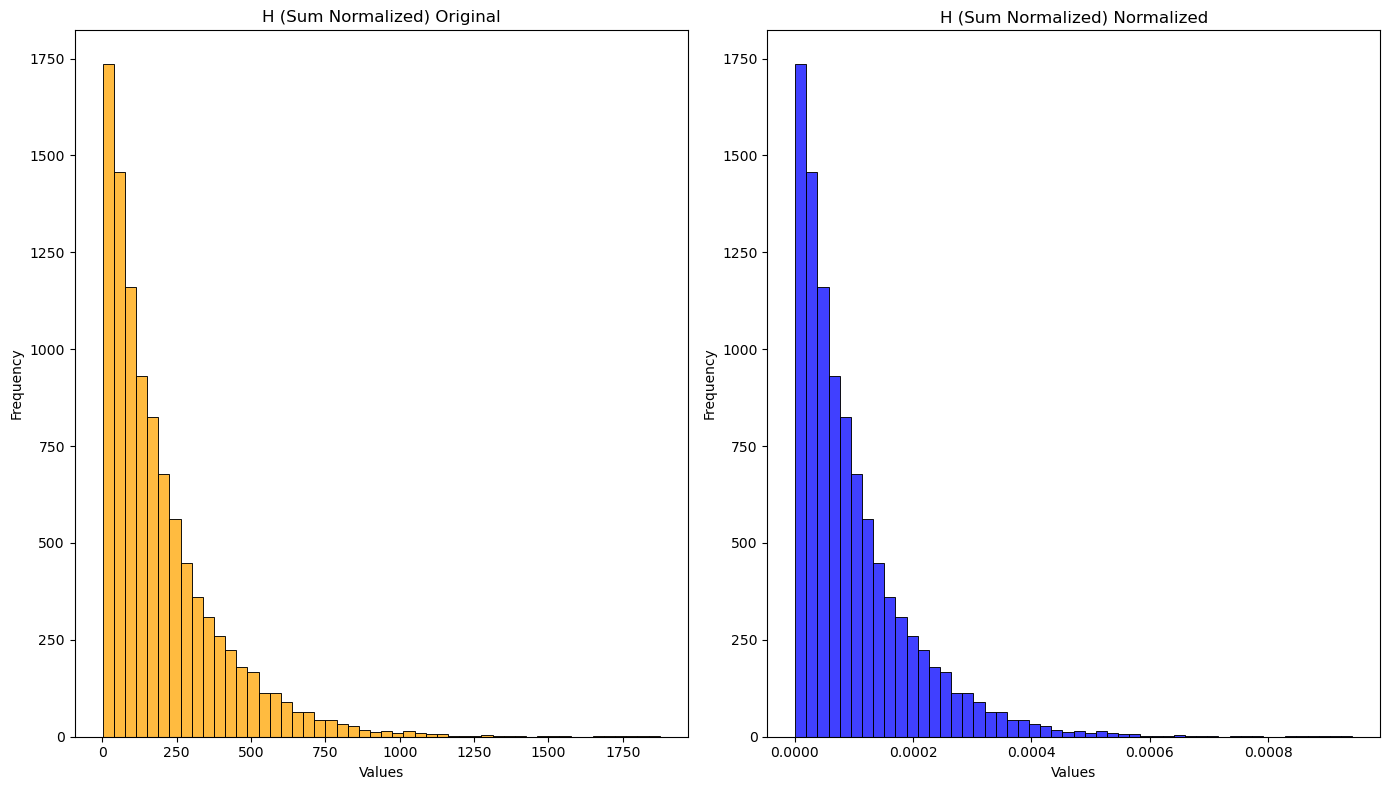

In [12]:
# Divide by sum of its values
B_sum = B / np.sum(B)
I_sum = I / np.sum(I)
H_sum = H / np.sum(H)

compare_histograms(B, B_sum, 'B (Sum Normalized)')
compare_histograms(I, I_sum, 'I (Sum Normalized)')
compare_histograms(H, H_sum, 'H (Sum Normalized)')

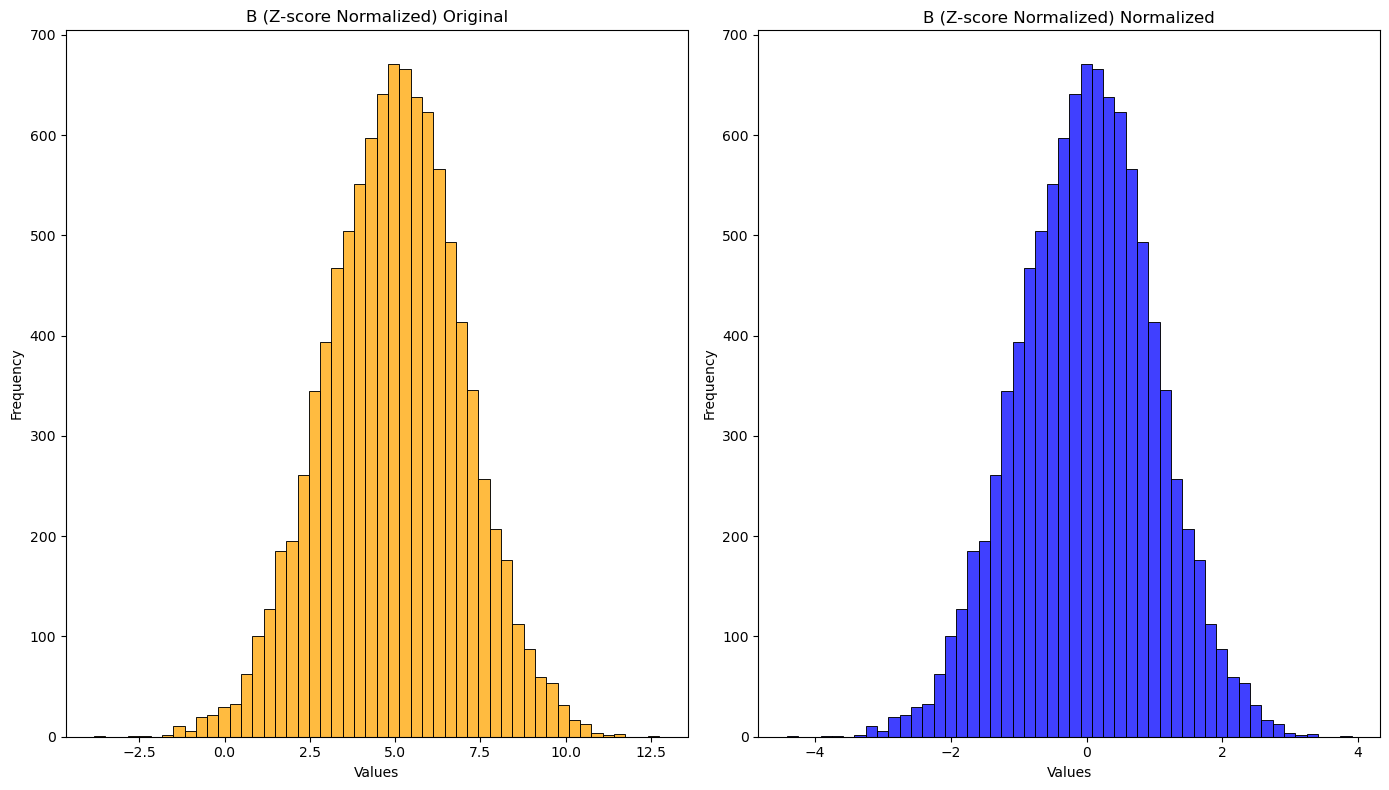

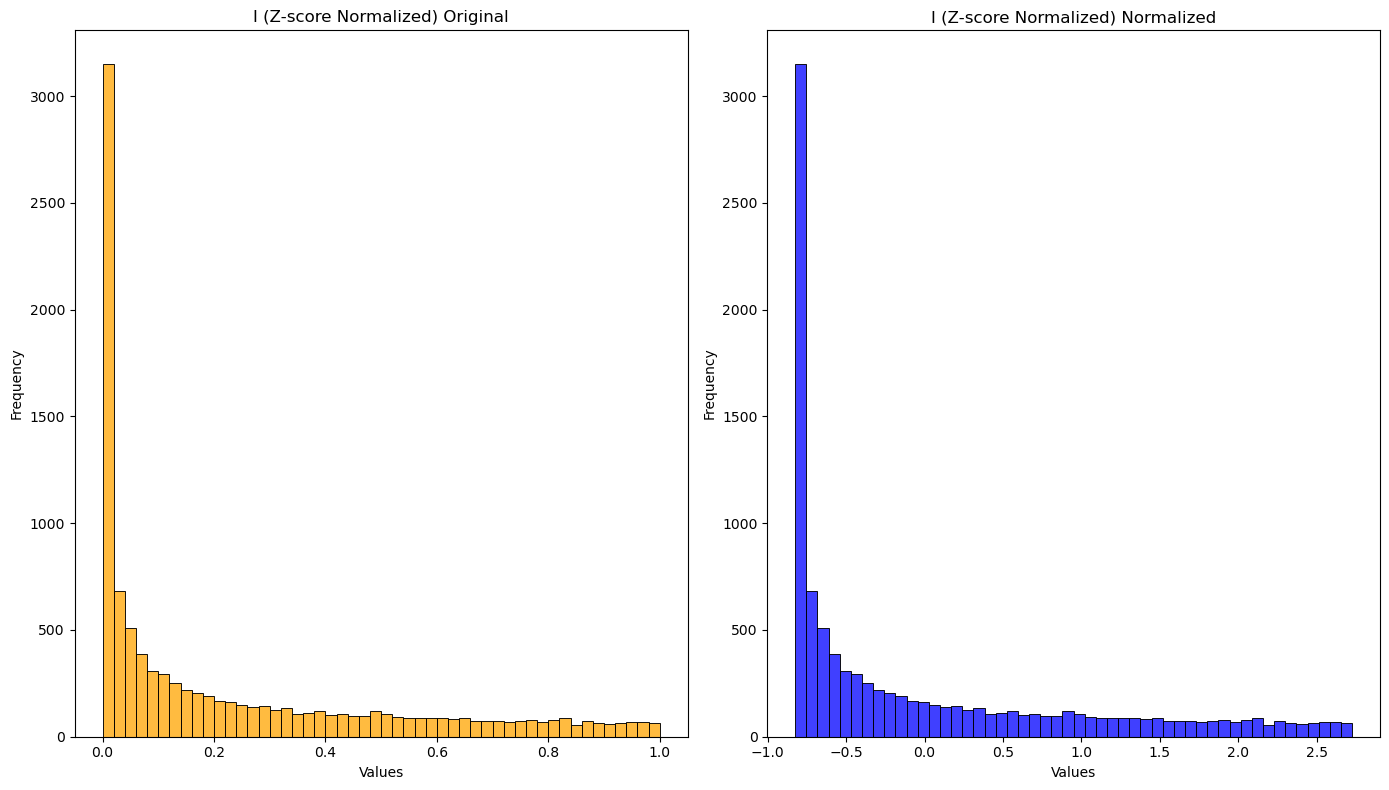

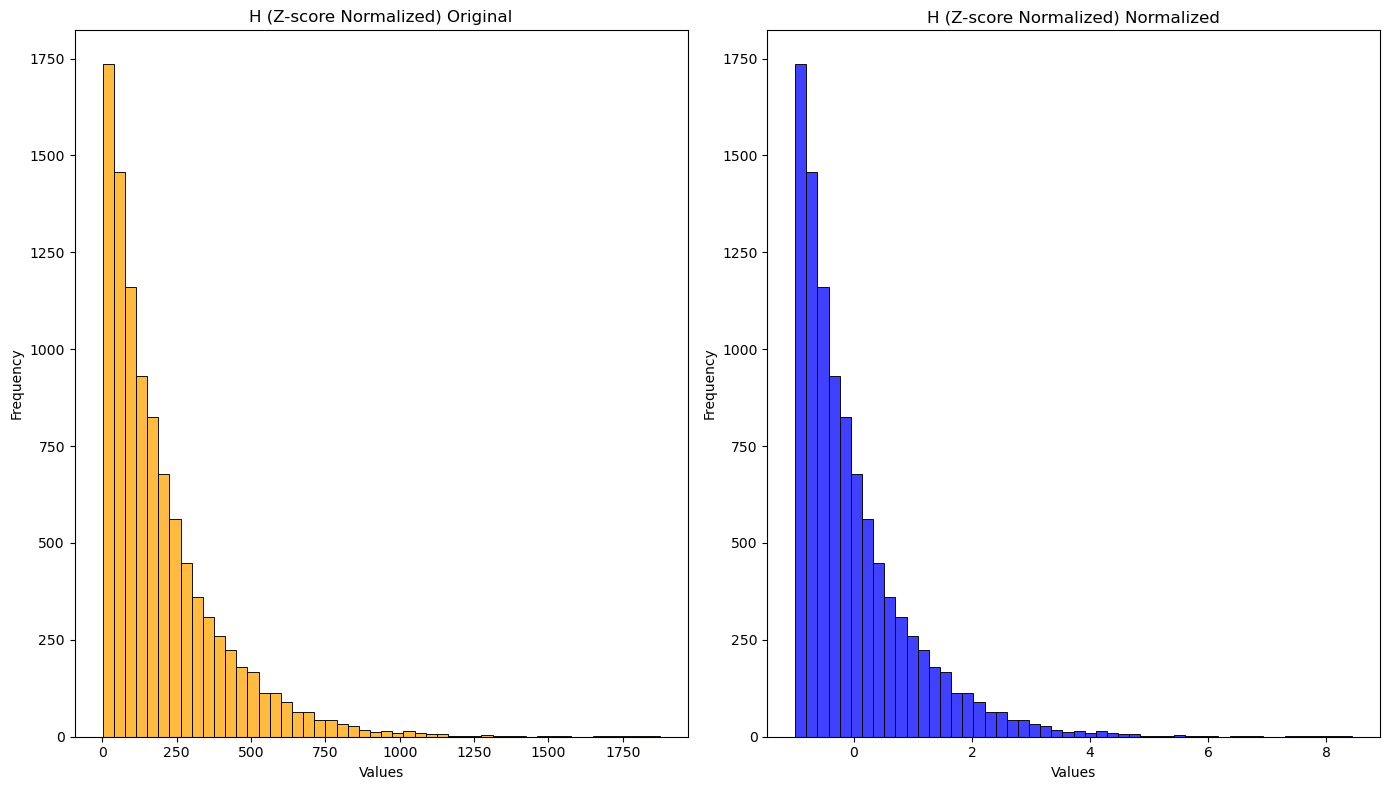

In [13]:
# Convert into z-score 
B_zscore = zscore(B)
I_zscore = zscore(I)
H_zscore = zscore(H)

compare_histograms(B, B_zscore, 'B (Z-score Normalized)')
compare_histograms(I, I_zscore, 'I (Z-score Normalized)')
compare_histograms(H, H_zscore, 'H (Z-score Normalized)')

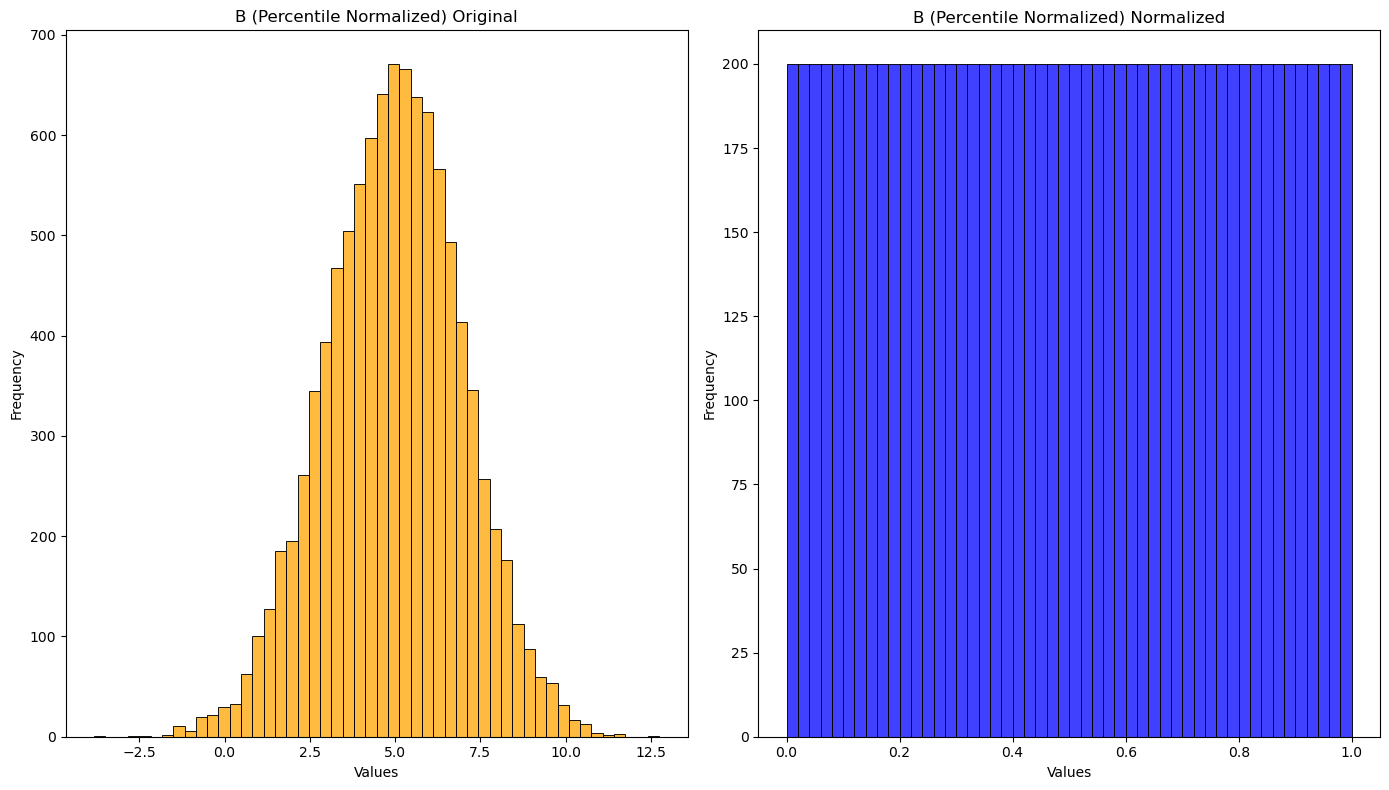

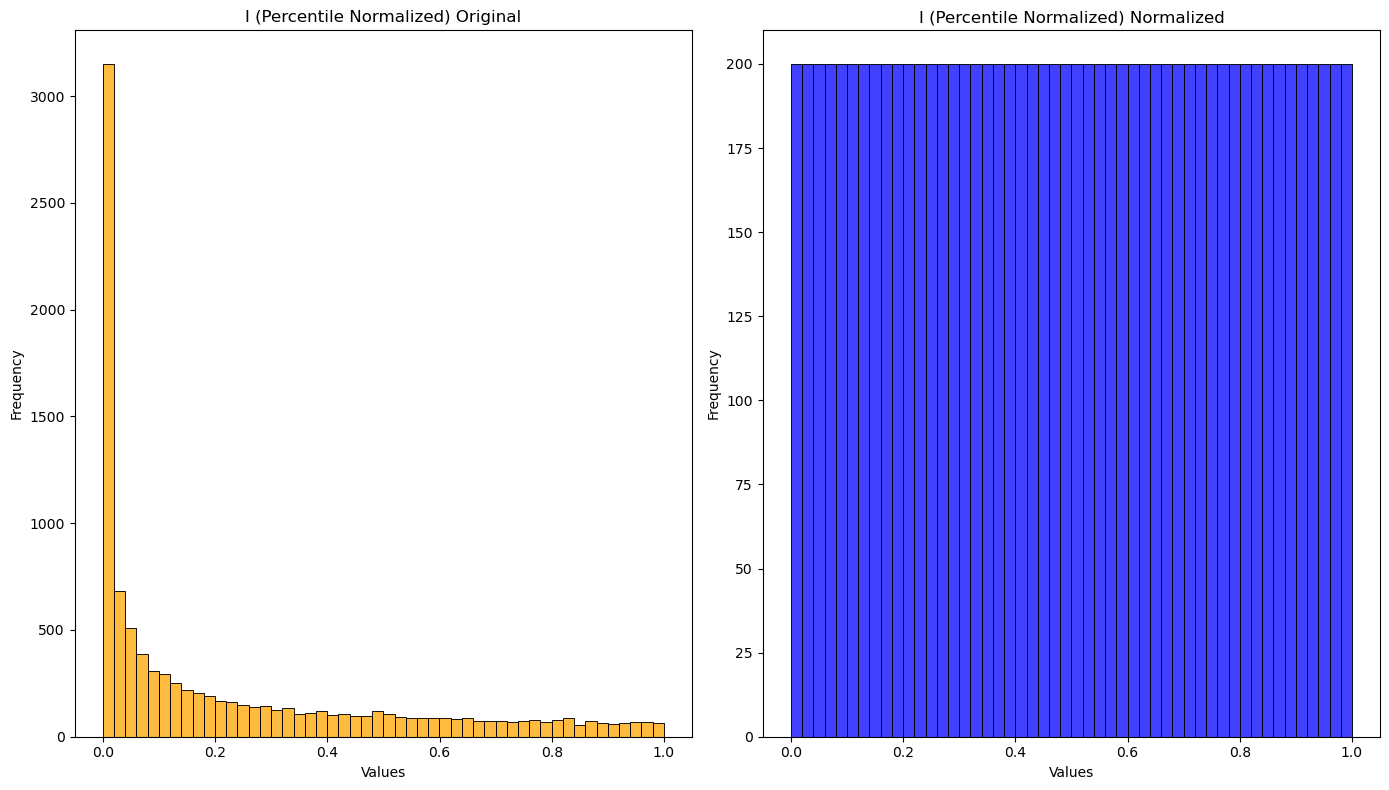

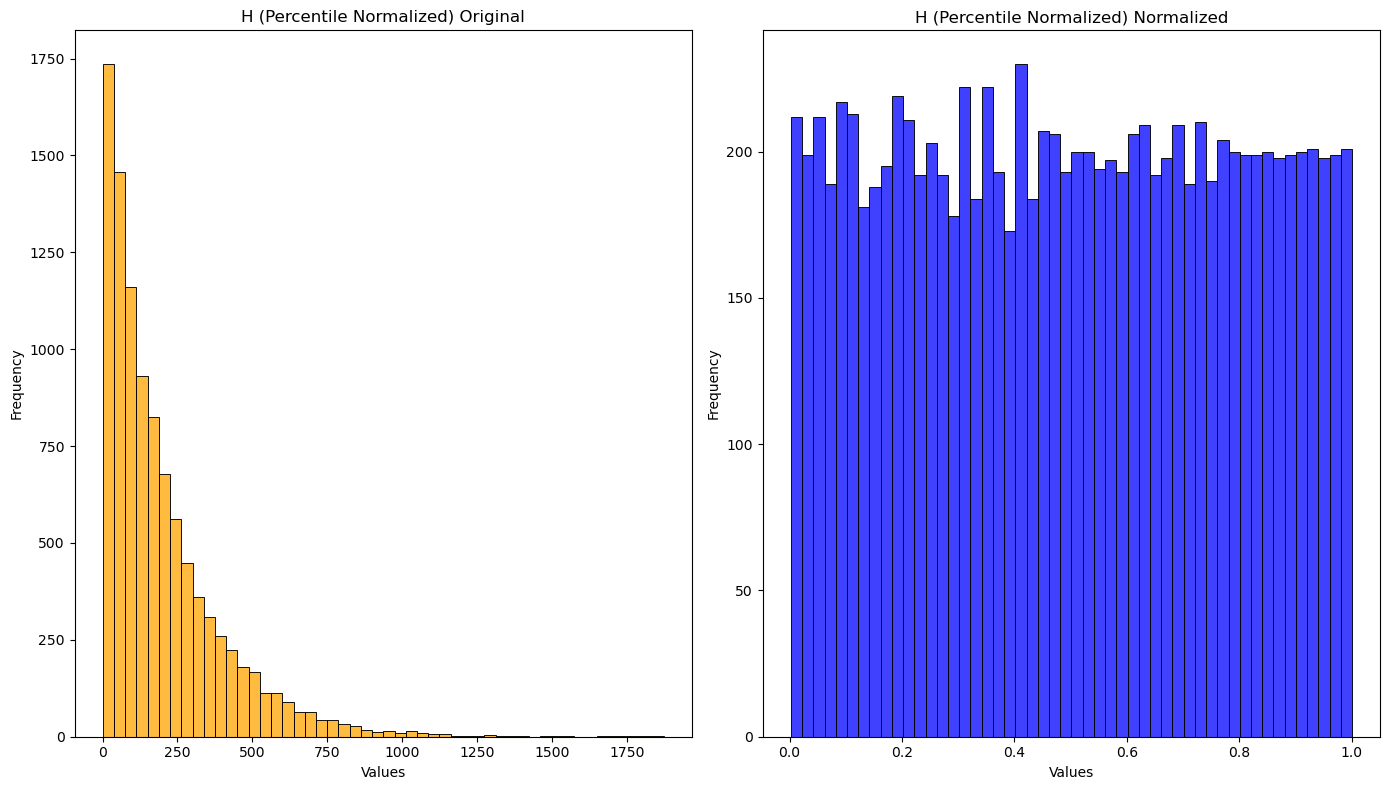

In [14]:
# Convert into percentile
B_percentile = rankdata(B, method='average') / len(B)
I_percentile = rankdata(I, method='average') / len(I)
H_percentile = rankdata(H, method='average') / len(H)

compare_histograms(B, B_percentile, 'B (Percentile Normalized)')
compare_histograms(I, I_percentile, 'I (Percentile Normalized)')
compare_histograms(H, H_percentile, 'H (Percentile Normalized)')

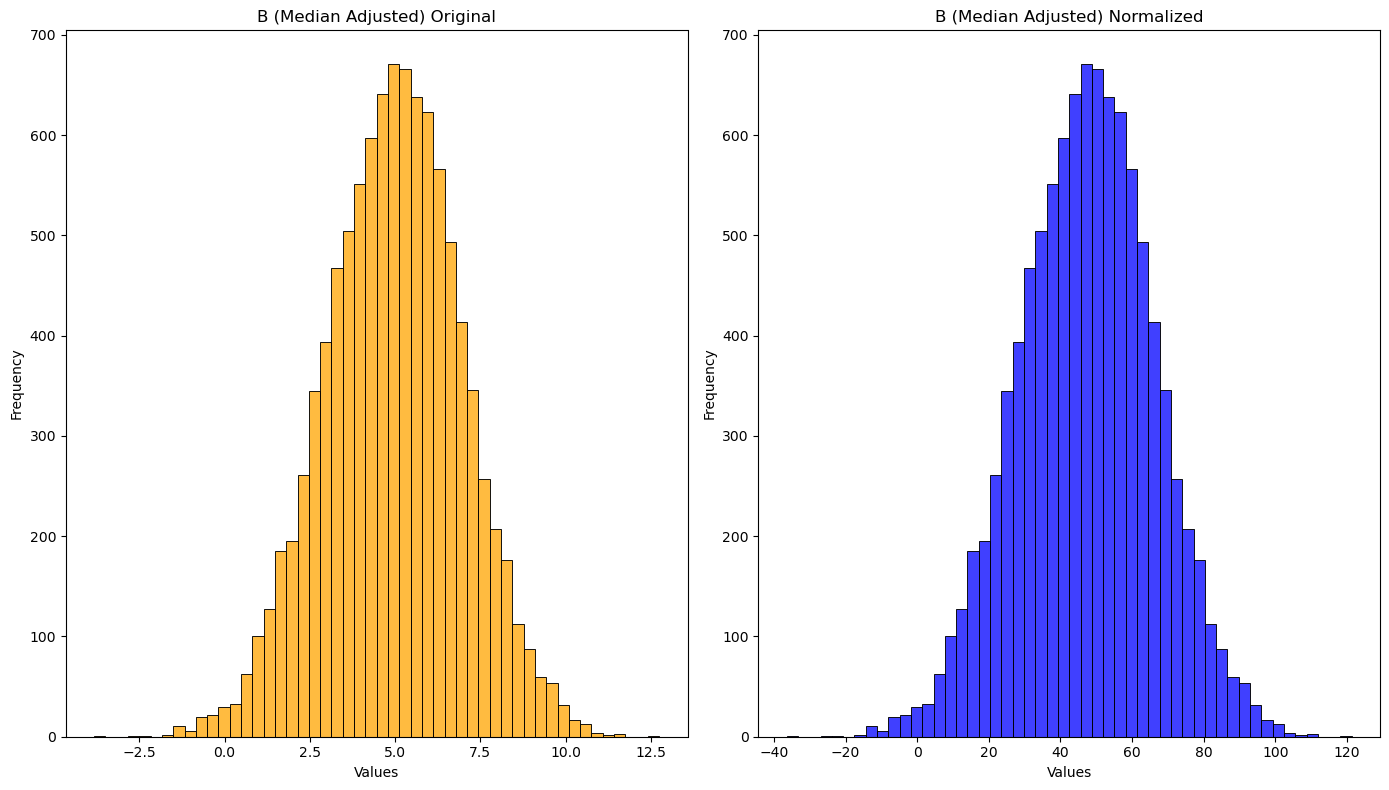

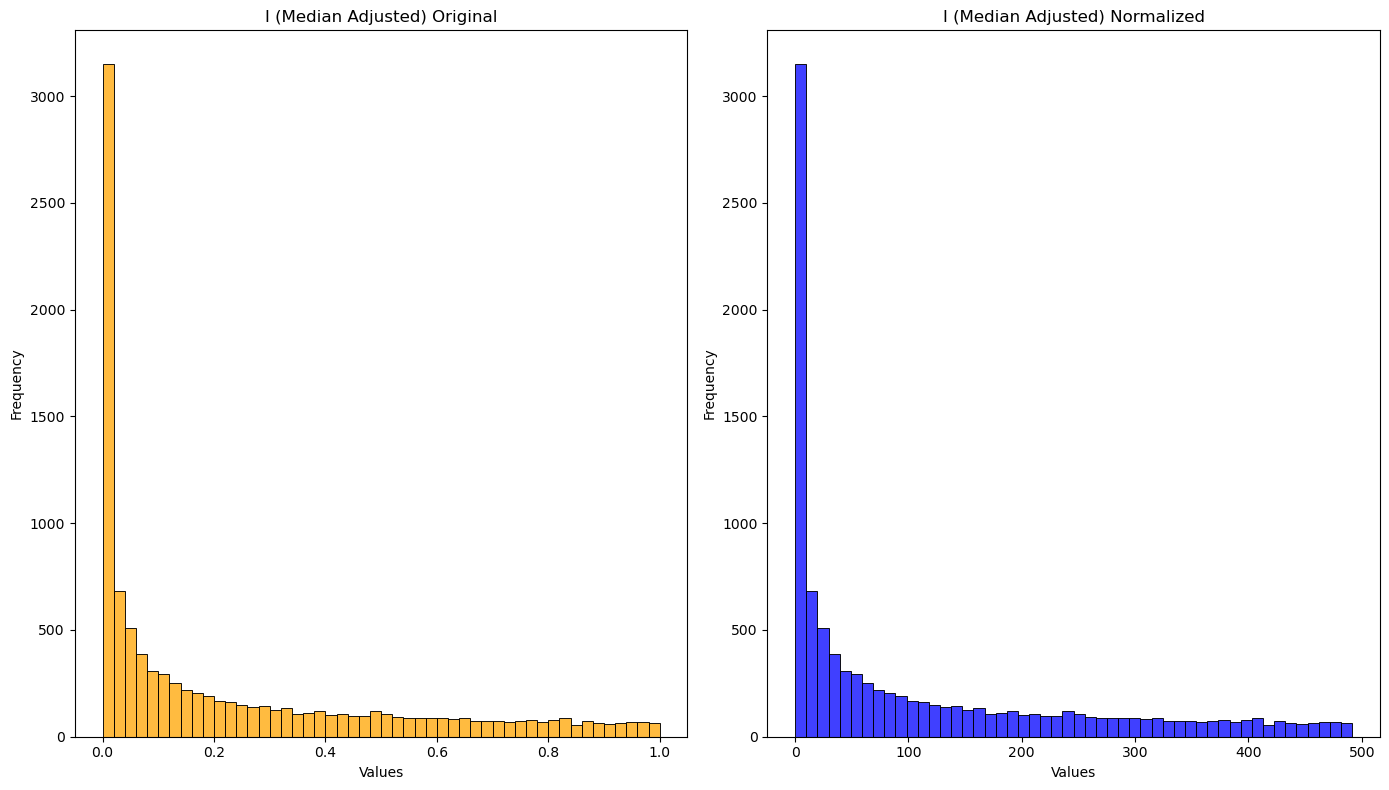

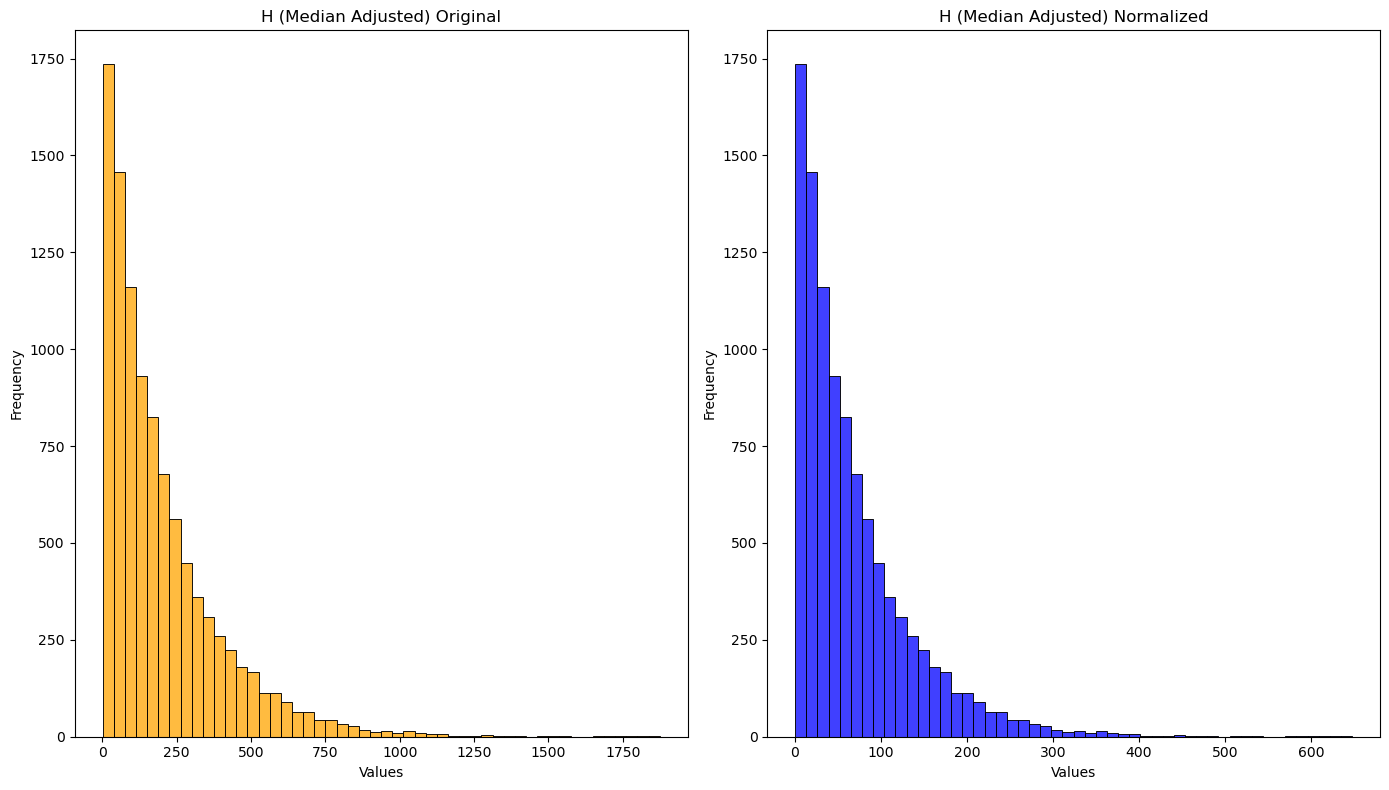

In [15]:
# Make mean of all variables same
medians = [np.median(B), np.median(I), np.median(H)]
m1 = np.mean(medians)
B_median_adjusted = B * (m1 / medians[0])
I_median_adjusted = I * (m1 / medians[1])
H_median_adjusted = H * (m1 / medians[2])

compare_histograms(B, B_median_adjusted, 'B (Median Adjusted)')
compare_histograms(I, I_median_adjusted, 'I (Median Adjusted)')
compare_histograms(H, H_median_adjusted, 'H (Median Adjusted)')

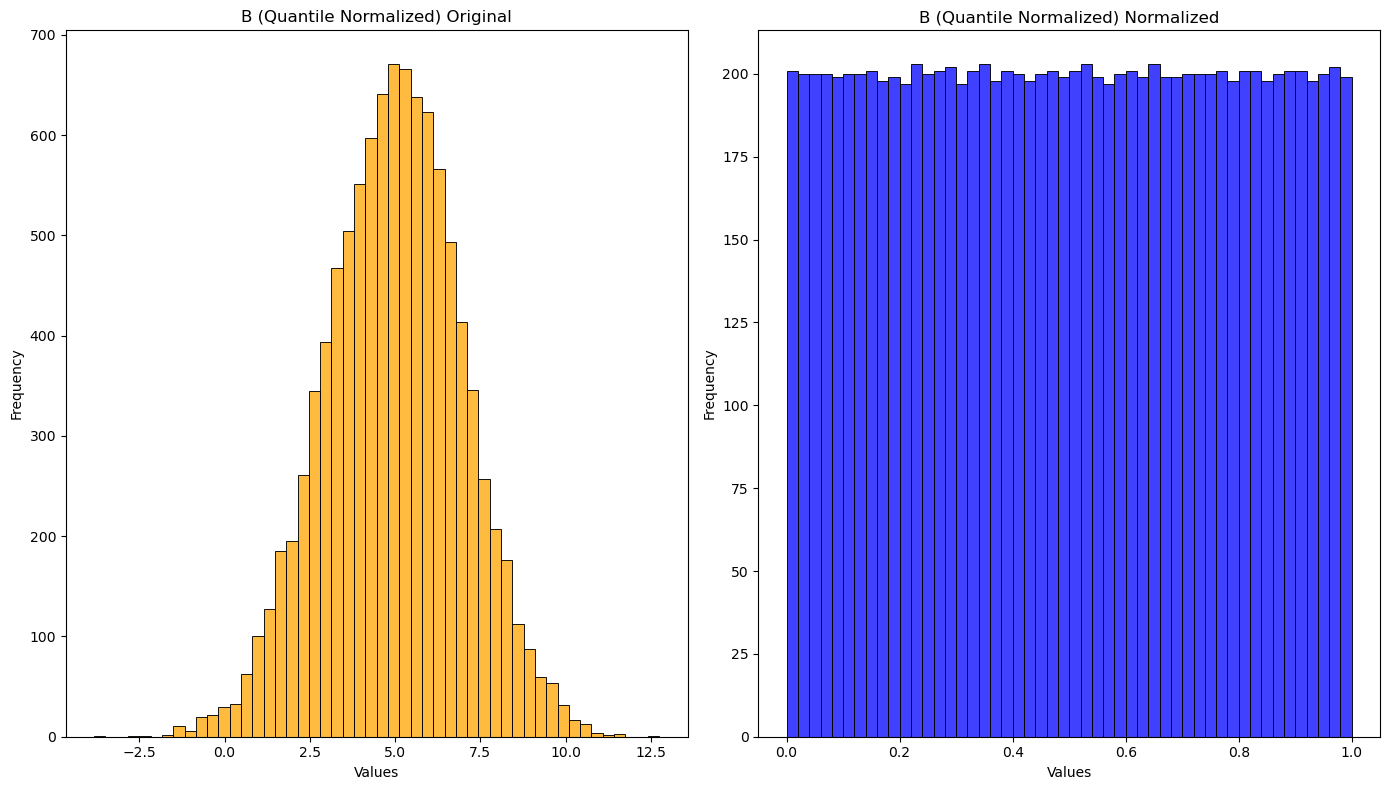

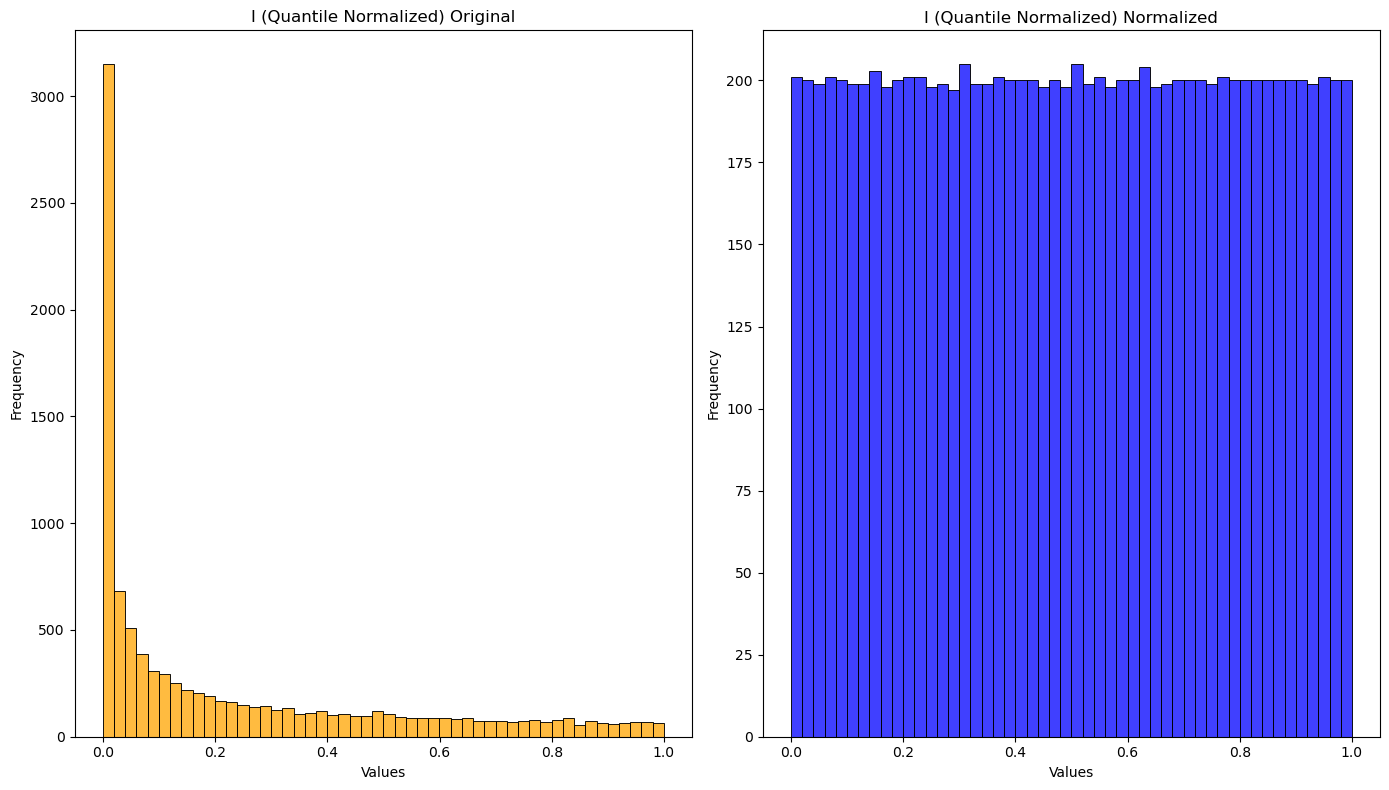

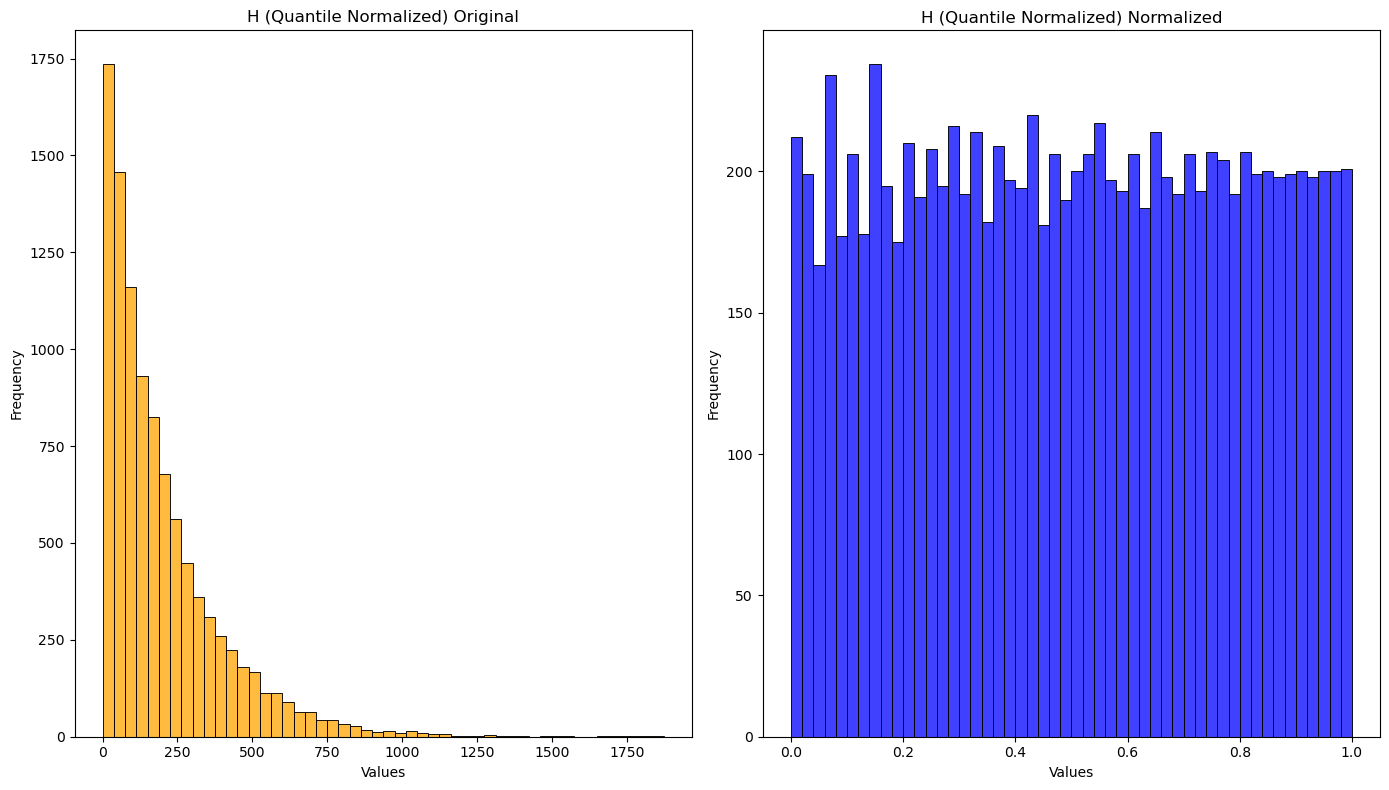

In [16]:
# Quantile Normalization
stacked = np.column_stack([B, I, H])
quantile_normalized = quantile_transform(stacked, axis=0, copy=True)
B_quantile, I_quantile, H_quantile = quantile_normalized.T

compare_histograms(B, B_quantile, 'B (Quantile Normalized)')
compare_histograms(I, I_quantile, 'I (Quantile Normalized)')
compare_histograms(H, H_quantile, 'H (Quantile Normalized)')